# Baseline Calc
This notebook is for generating the expected results

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Coax Testing

<IPython.core.display.Javascript object>


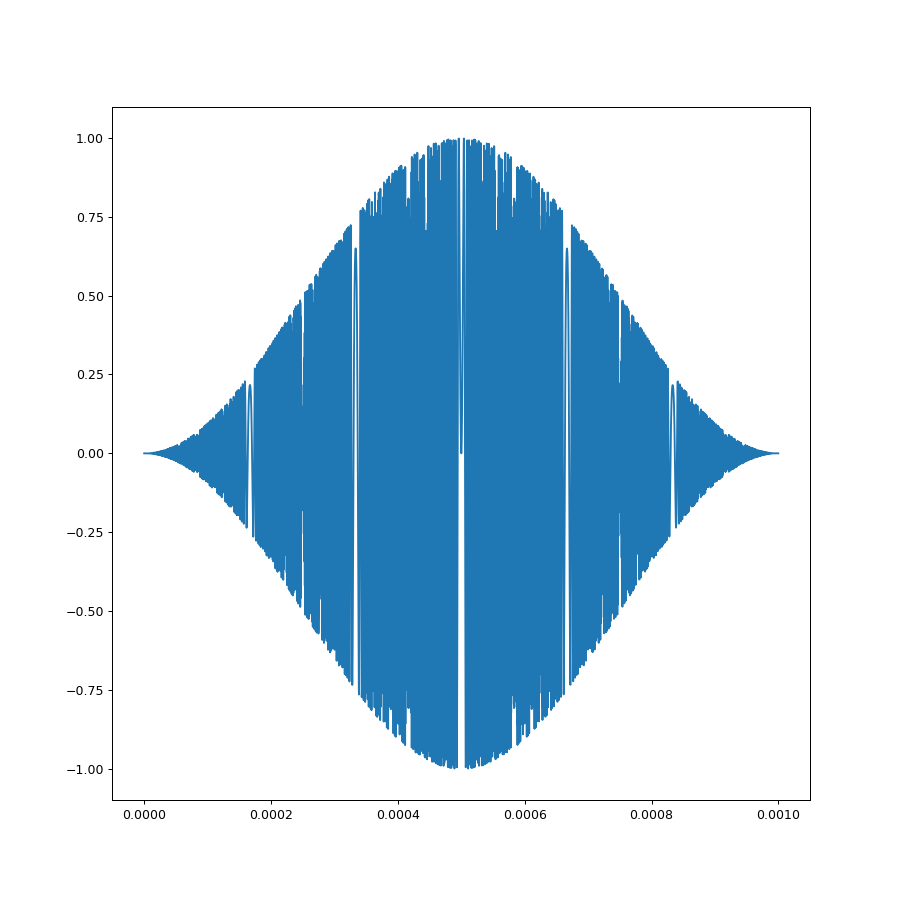

In [23]:
c = 300e6  #speed of light
clen = 152.4 #length of the coax
f_low = 65e6 #lower frequency limit
f_high = 95e6 #upper frequency limit
t_chirp = 1e-3
fs = 5000000 #sample frequency
vf = 0.83 #cable velocity factor

#generate a hann window
window = np.hanning(t_chirp*fs)

#generate the chip
freqslope = (f_high - f_low)/t_chirp
t = np.arange(0, t_chirp, 1/fs)
chirp = np.sin(2*np.pi*(freqslope/2*t**2 + f_low*t)) * window

#plot the chirp
fig1 = plt.figure(figsize=(10,10))
plt.plot(t, chirp)

<IPython.core.display.Javascript object>


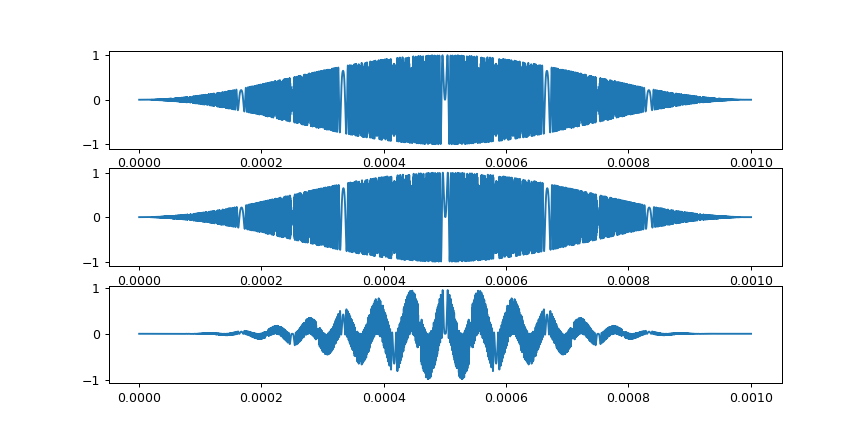

In [24]:
#extend the arrays, and then multiply to "dechirp"
tx_chirp = np.concatenate((chirp, np.zeros(int(clen/c/vf*fs))))
rx_chirp = np.concatenate((np.zeros(int(clen/c/vf*fs)), chirp))
dechirp = tx_chirp * rx_chirp
tnew = np.arange(0,len(dechirp)/fs,1/fs)

#plot both chirps and the mixed result
fig2, axs = plt.subplots(3,1)
axs[0].plot(tnew,tx_chirp)
axs[1].plot(tnew,rx_chirp)
axs[2].plot(tnew,dechirp)

<IPython.core.display.Javascript object>


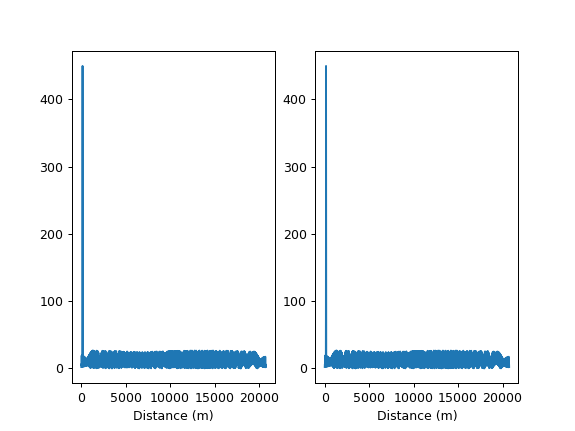

Text(0.5, 0, 'Distance (m)')

In [27]:
#plot an FFT of the dechirped signal
ft = np.abs(np.fft.fftshift(np.fft.fft(dechirp)))
freqs = np.fft.fftshift(np.fft.fftfreq(int(t_chirp*fs+clen/c/vf*fs), 1/fs))/freqslope*c*vf
fig3,axs3 = plt.subplots(1,2)
siglen = int(len(freqs)/2)
axs3[0].plot(freqs[siglen:], ft[siglen:])
axs3[0].set_xlabel("Distance (m)")
axs3[1].plot(freqs[siglen:5150], ft[siglen:5150])
axs3[1].set_xlabel("Distance (m)")

In [28]:
print("Estimated Coax Length: " + str(freqs[siglen:][np.argmax(ft[siglen:])]) + "m")

Estimated Coax Length: 149.31041375174897m


<IPython.core.display.Javascript object>


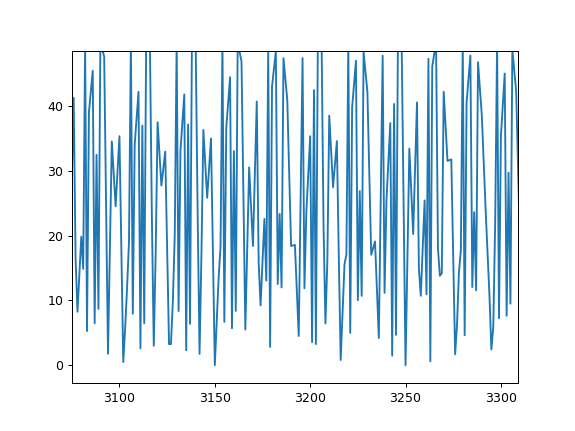

In [34]:
#plot an FFT of the original signals
fig4 = plt.figure()
ft1 = np.abs(np.fft.fftshift(np.fft.fft(chirp)))
freqs1 = np.fft.fftshift(np.fft.fftfreq(int(t_chirp*fs), 1/fs))
plt.plot(ft1)